In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import pyplot as plt
import copy
from netCDF4 import Dataset, num2date, date2num
import more_itertools as mit
from scipy import arange, cos, exp,stats
import scipy
from scipy.interpolate import RegularGridInterpolator
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
import matplotlib.patches as patches
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
import pandas as pd
import openpyxl
from scipy import signal
from scipy import stats
import xarray as xr
from statsmodels.stats.multitest import fdrcorrection
import matplotlib.patches as mpatches
from scipy.stats import linregress

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
def detrend_and_remove_seasonal(var):
    var_detrend = np.zeros_like(var)
    for i_box in range(73):
        temp = np.array([var[73*i_year+i_box] for i_year in range(42)])
        temp = temp - np.array(len(temp)*[np.nanmean(temp,axis=0)])
        temp = signal.detrend(temp,axis=0)
        for i_year in range(42):
            var_detrend[73*i_year+i_box]  = temp[i_year]
    return var_detrend 

In [3]:
def remove_seasonal(var,yearN,stepN):
    var_detrend = np.zeros_like(var)
    for i_box in range(stepN):
        temp = np.array([var[stepN*i_year+i_box] for i_year in range(yearN)])
        temp = temp - np.array(len(temp)*[np.nanmean(temp,axis=0)])

        # temp = signal.detrend(temp,axis=0)
        for i_year in range(yearN):
            var_detrend[stepN*i_year+i_box]  = temp[i_year]
    return var_detrend 

# READ DATA

In [4]:
NCname = '/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/ERA5_Z500_6h_1979-2020_daymean_del29feb_1x1_5days.nc'
NCData = Dataset(NCname) 
z500 = np.array(NCData.variables['var129'][:])
z500 = z500/9.80665
NCData = Dataset(NCname) 
lon_era5 = NCData.variables['lon'][:]
lat_era5 = NCData.variables['lat'][:]
LON_era51, LAT_era51 = np.meshgrid(lon_era5, lat_era5)
time = NCData.variables['time']
dates = list(num2date(time[:], time.units, time.calendar))
year_era5_all1 = np.array([date.year for date in dates])
mon_era5_all1 = np.array([date.month for date in dates])
day_era5_all1 = np.array([date.day for date in dates])
NCData.close()
z500_y = np.array([np.nanmean(z500[np.in1d(year_era5_all1,[i])&np.in1d(mon_era5_all1,[6,7,8])],axis=0) for i in range(1979,2021)])
z500_detrend = copy.deepcopy(remove_seasonal(z500_y,42,1))
z500_detrend = np.squeeze(z500_detrend)


In [5]:
np.squeeze(z500).shape

(3066, 181, 360)

In [6]:
z500_y = np.squeeze(z500_y)

In [7]:
z500_y.shape

(42, 181, 360)

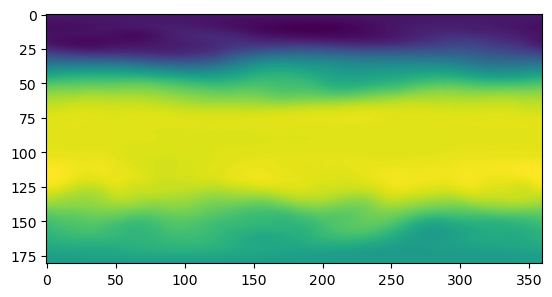

In [8]:
plt.imshow(z500_y[0])

In [9]:
lat_era5

masked_array(data=[-90., -89., -88., -87., -86., -85., -84., -83., -82.,
                   -81., -80., -79., -78., -77., -76., -75., -74., -73.,
                   -72., -71., -70., -69., -68., -67., -66., -65., -64.,
                   -63., -62., -61., -60., -59., -58., -57., -56., -55.,
                   -54., -53., -52., -51., -50., -49., -48., -47., -46.,
                   -45., -44., -43., -42., -41., -40., -39., -38., -37.,
                   -36., -35., -34., -33., -32., -31., -30., -29., -28.,
                   -27., -26., -25., -24., -23., -22., -21., -20., -19.,
                   -18., -17., -16., -15., -14., -13., -12., -11., -10.,
                    -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,
                     0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
                     9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
                    18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
                    27.,  28.,  29.,  30.,  31.,  3

In [10]:
lb_EU = 3
rb_EU = 18
bb_EU = 45
tb_EU = 55

In [11]:
14*9

126

In [12]:
var_EU = []
for i in range(42):
    a = z500_y[i]
    b = a[(LAT_era51>bb_EU)&(LAT_era51<tb_EU)&(LON_era51>lb_EU)&(LON_era51<rb_EU)].reshape((9,14))
    c = np.average(b)
    var_EU.append(c)

    



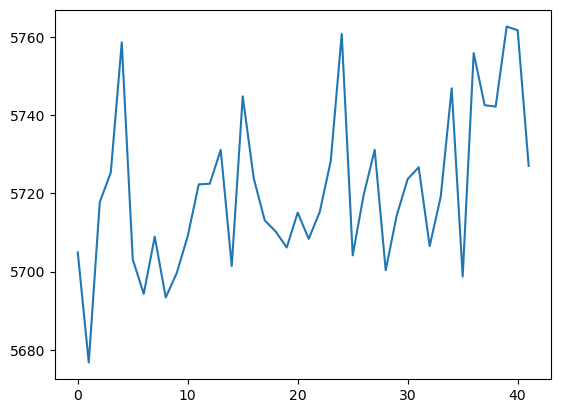

In [13]:
plt.plot(var_EU)

In [14]:
i=0
a = z500_y[i]
b = a[(LAT_era51>bb_EU)&(LAT_era51<tb_EU)&(LON_era51>lb_EU)&(LON_era51<rb_EU)].reshape((9,14))
c = np.average(b)


In [15]:
a.shape

(181, 360)

In [16]:
LON_era51.shape

(181, 360)

In [17]:
LAT_era51.shape

(181, 360)

In [18]:
b.shape

(9, 14)

In [19]:
NCname = '/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/ERA5_SST_6h_1979-2020_daymean_del29feb_monmean_1x1.nc'
NCData = Dataset(NCname) 
SST = np.array(NCData.variables['var34'][:])
SST = np.squeeze(SST)
lon_era5 = NCData.variables['lon'][:]
lat_era5 = NCData.variables['lat'][:]
LON_era5, LAT_era5 = np.meshgrid(lon_era5, lat_era5)
time = NCData.variables['time']
dates = list(num2date(time[:], time.units, time.calendar))
year_era5_all = np.array([date.year for date in dates])
mon_era5_all = np.array([date.month for date in dates])
day_era5_all = np.array([date.day for date in dates])
NCData.close()
SST[SST<-1000]=np.nan
SST_y = np.array([np.nanmean(SST[np.in1d(year_era5_all,[i])&np.in1d(mon_era5_all,[6,7,8])],axis=0) for i in range(1979,2021)])
SST_detrend = copy.deepcopy(remove_seasonal(SST_y,42,1))

/var/folders/r1/j7tk96k16m55ct81z5sl6qsm0000gn/T/ipykernel_33281/43955369.py:15: RuntimeWarning: Mean of empty slice
  SST_y = np.array([np.nanmean(SST[np.in1d(year_era5_all,[i])&np.in1d(mon_era5_all,[6,7,8])],axis=0) for i in range(1979,2021)])
/var/folders/r1/j7tk96k16m55ct81z5sl6qsm0000gn/T/ipykernel_33281/2174647040.py:5: RuntimeWarning: Mean of empty slice
  temp = temp - np.array(len(temp)*[np.nanmean(temp,axis=0)])


In [20]:


yearrange = range(1979,2021)
NCname = r'/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/ERA5_Z500_6h_1979-2020_daymean_del29feb_1x1_5days.nc'
NCData = Dataset(NCname)
lon_era5 = NCData.variables['lon'][:]
lat_era5 = NCData.variables['lat'][:]
LON_era51, LAT_era51 = np.meshgrid(lon_era5, lat_era5)
time = NCData.variables['time']
dates = list(num2date(time[:], time.units, time.calendar))
year_era5_all1 = np.array([date.year for date in dates])
mon_era5_all1 = np.array([date.month for date in dates])
day_era5_all1 = np.array([date.day for date in dates])
NCData.close()


In [21]:
stepN = len(year_era5_all1[year_era5_all1==1979])
yearN = 42
lb_EU = 3
rb_EU = 18
bb_EU = 45
tb_EU = 55

In [6]:
# NCname = 'ERA5_Z500_6h_1979-2020_daymean_del29feb_1x1_5days.nc'
# NCData = Dataset(NCname) 
# z500 = np.array(NCData.variables['var129'][:])
# z500 = z500/9.80665

In [22]:
#t2m_max_region = np.array(xr.open_dataset('/Net/Groups/BGI/scratch/yt/data/Europe/t2m_max_region.nc')['__xarray_dataarray_variable__'][:][:])
#base_pctl90_region = np.array(xr.open_dataset('/Net/Groups/BGI/scratch/yt/data/Europe/base_pctl90_region.nc')['__xarray_dataarray_variable__'][:][:])
t2m_region = np.array(xr.open_dataset('/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/t2m_region.nc')['__xarray_dataarray_variable__'][:][:])

tp_region = np.array(xr.open_dataset('/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/tp_region.nc')['__xarray_dataarray_variable__'][:][:])

PET_region = np.array(xr.open_dataset('/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/PET_region.nc')['__xarray_dataarray_variable__'][:][:])

z500_T_region = np.array(xr.open_dataset('/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/z500_T2m_6Waves.nc')['__xarray_dataarray_variable__'][:][:])
z500_WSD_region = np.array(xr.open_dataset('/Users/tianyl/Desktop/Study/4_summer school in como/CEU_CEN_data/z500_WSD_6Waves.nc')['__xarray_dataarray_variable__'][:][:])

In [23]:
z500_T_region_y = np.array([np.nanmean(z500_T_region[np.in1d(year_era5_all1,[i])&np.in1d(mon_era5_all1,[6,7,8])]) for i in range(1979,2021)])
z500_WSD_region_y = np.array([np.nanmean(z500_WSD_region[np.in1d(year_era5_all1,[i])&np.in1d(mon_era5_all1,[6,7,8])]) for i in range(1979,2021)])
t2m_region_y = np.array([np.nanmean(t2m_region[np.in1d(year_era5_all1,[i])&np.in1d(mon_era5_all1,[6,7,8])]) for i in range(1979,2021)])
WSD_region_y = np.array([np.nanmean((tp_region*1000*24-PET_region)[np.in1d(year_era5_all1,[i])&np.in1d(mon_era5_all1,[6,7,8])]) for i in range(1979,2021)])

In [24]:
yearN=42
stepN=1

In [25]:
t2m_region_de = copy.deepcopy(remove_seasonal(t2m_region_y,yearN,stepN))
WSD_region_de = copy.deepcopy(remove_seasonal(WSD_region_y,yearN,stepN))
z500_T_region_de = copy.deepcopy(remove_seasonal(z500_T_region_y,yearN,stepN))
z500_WSD_region_de = copy.deepcopy(remove_seasonal(z500_WSD_region_y,yearN,stepN))

# HW

In [26]:
HW_index = np.argsort(z500_T_region_de)[::-1][:10]
print(HW_index)
WSD_index = np.argsort(z500_WSD_region_de)[::-1][:10]
print(WSD_index)

[15 13 30 24 36  3  6 40 12 25]
[24 12 13 15 16 34 39 30 36 37]


In [125]:
SST_detrend_Atlantic = [np.nanmean(i[(LON_era5>=315)&(LON_era5<=340)&(LAT_era5>=40)&(LAT_era5<=60)]) for i in SST_detrend]
np.save('SST_detrend_Atlantic.npy',SST_detrend_Atlantic)  
SST_detrend_Pacific = [np.nanmean(i[(LON_era5>=210)&(LON_era5<=235)&(LAT_era5>=35)&(LAT_era5<=55)]) for i in SST_detrend]
np.save('SST_detrend_Pacific.npy',SST_detrend_Pacific)  


In [110]:
linregress(SST_detrend_Atlantic,z500_T_region_de)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


LinregressResult(slope=-0.13244542468031753, intercept=-9.792768995014478e-08, rvalue=-0.6304307322699912, pvalue=7.656073822405346e-06, stderr=0.025785092260229736, intercept_stderr=0.012940517198978433)

In [111]:
linregress(SST_detrend_Atlantic,z500_WSD_region_de)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


LinregressResult(slope=-0.07981016541372682, intercept=-5.901015570853389e-08, rvalue=-0.4367838150360023, pvalue=0.0038271117291011477, stderr=0.025989322291778843, intercept_stderr=0.013043012168131031)

In [127]:
linregress(SST_detrend_Pacific,z500_T_region_de)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


LinregressResult(slope=0.05228590096222271, intercept=-8.748411655004144e-08, rvalue=0.33517796287803775, pvalue=0.030018461238202385, stderr=0.023238143241298824, intercept_stderr=0.015706333485774156)

In [128]:
linregress(SST_detrend_Pacific,z500_WSD_region_de)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


LinregressResult(slope=0.05050678471572637, intercept=-8.450732146152233e-08, rvalue=0.3722618178035943, pvalue=0.015195286735915536, stderr=0.019910354614428173, intercept_stderr=0.013457128056533691)

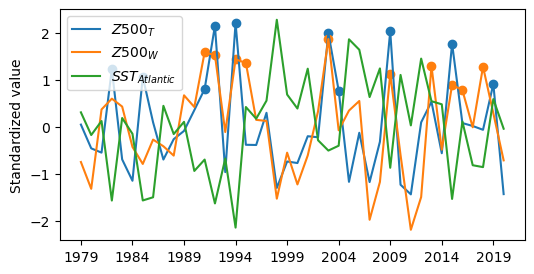

In [108]:
#plt.plot(t2m_region_de/np.std(t2m_region_de))
fig = plt.figure(figsize=(6,3))
plt.plot(np.arange(1979,2021),z500_T_region_de/np.std(z500_T_region_de),label='$Z500_{T}$')
plt.plot(np.arange(1979,2021),z500_WSD_region_de/np.std(z500_WSD_region_de),label='$Z500_{W}$')
plt.plot(np.arange(1979,2021),SST_detrend_Atlantic/np.std(SST_detrend_Atlantic),label='$SST_{Atlantic}$')

plt.scatter([np.arange(1979,2021)[i] for i in HW_index],[(z500_T_region_de/np.std(z500_T_region_de))[i] for i in HW_index])
plt.scatter([np.arange(1979,2021)[i] for i in WSD_index],[(z500_WSD_region_de/np.std(z500_WSD_region_de))[i] for i in WSD_index])
plt.xticks(np.arange(1979,2021)[::5])
plt.ylabel('Standardized value')
plt.legend()
plt.savefig('Fig 7a.Yearly_SST_WSD.jpg',dpi=300)

In [28]:

p_temp = np.zeros((181,360))
for i_i in range(181):
    for i_j in range(360):
        A = SST_detrend[:,i_i,i_j][HW_index]
        B = [SST_detrend[:,i_i,i_j][i] for i in np.arange(42) if i not in HW_index]
        p_temp[i_i,i_j] = stats.ttest_ind(A,B)[1]
rejected, q_temp = fdrcorrection(p_temp.ravel())
q_temp = q_temp.reshape((181,360))


In [29]:

p_temp1 = np.zeros((181,360))
for i_i in range(181):
    for i_j in range(360):
        A = SST_detrend[:,i_i,i_j][WSD_index]
        B = [SST_detrend[:,i_i,i_j][i] for i in np.arange(42) if i not in WSD_index]
        p_temp1[i_i,i_j] = stats.ttest_ind(A,B)[1]
rejected, q_temp1 = fdrcorrection(p_temp1.ravel())
q_temp1 = q_temp1.reshape((181,360))

In [42]:

p_temp2 = np.zeros((181,360))
for i_i in range(181):
    for i_j in range(360):
        A = z500_detrend[:,i_i,i_j][HW_index]
        B = [z500_detrend[:,i_i,i_j][i] for i in np.arange(42) if i not in HW_index]
        p_temp2[i_i,i_j] = stats.ttest_ind(A,B)[1]
rejected, q_temp2 = fdrcorrection(p_temp.ravel())
q_temp2 = q_temp2.reshape((181,360))

In [30]:

p_temp3 = np.zeros((181,360))
for i_i in range(181):
    for i_j in range(360):
        A = z500_detrend[:,i_i,i_j][WSD_index]
        B = [z500_detrend[:,i_i,i_j][i] for i in np.arange(42) if i not in WSD_index]
        p_temp3[i_i,i_j] = stats.ttest_ind(A,B)[1]
rejected, q_temp3 = fdrcorrection(p_temp.ravel())
q_temp3 = q_temp3.reshape((181,360))

/var/folders/r1/j7tk96k16m55ct81z5sl6qsm0000gn/T/ipykernel_33281/4246255380.py:9: RuntimeWarning: Mean of empty slice
  con_value = np.nanmean(SST_detrend[HW_index],axis=0)


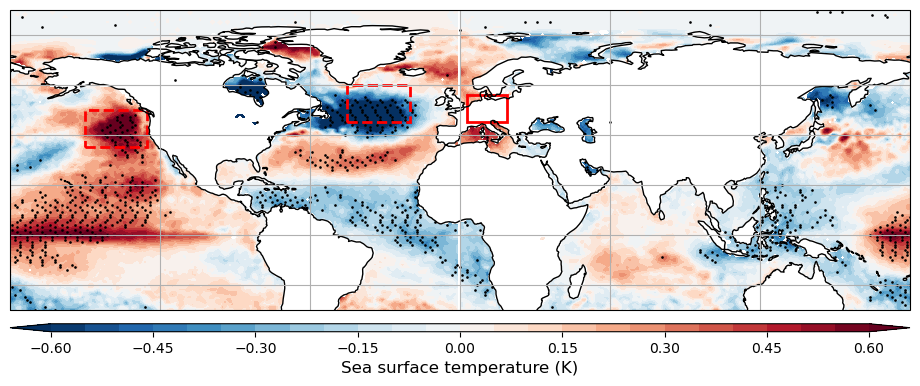

In [117]:
#%%
bnd_n = 90
bnd_s = -90
bnd_w = -180
bnd_e = 180

fig= plt.figure(figsize=(10, 4))

con_value = np.nanmean(SST_detrend[HW_index],axis=0)
    
proj = ccrs.PlateCarree(central_longitude=0)##
ax = fig.add_axes([0.05, 0.15, 0.9, 0.8],projection = proj)
#ax.text(0.02, 1.05,'Geopotential height (m) lag '+ str(i_lag),fontsize=15,transform=ax.transAxes)
con=ax.contourf(LON_era5,LAT_era5,con_value,levels=np.arange(-0.6,0.65,0.05),cmap = 'RdBu_r',extend='both')

p_x = LON_era5[p_temp<0.05][::5]
p_y = LAT_era5[p_temp<0.05][::5]
ax.scatter(p_x,p_y,color='k',s=0.8)

ax.coastlines()
ax.gridlines()
# ax.set_xticks([-180, -120, -60,0, 60, 120, 180, ], crs=ccrs.PlateCarree())
# ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,
                                number_format='.0f')
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([-179, 180,-30, 90])
#rect = patches.Rectangle((lb1, bb1), rb1-lb1+1, tb1-bb1+1, linewidth=2, edgecolor='purple', facecolor='none')
#ax.add_patch(rect)
rect = patches.Rectangle((lb_EU, bb_EU), rb_EU-lb_EU+1, tb_EU-bb_EU+1, linewidth=2, edgecolor='red', facecolor='none')
rect1 = patches.Rectangle((-45, 45), 25, 15, linewidth=2, edgecolor='red', linestyle='--',facecolor='none')
rect2 = patches.Rectangle((-150, 35), 25, 15, linewidth=2, edgecolor='red', linestyle='--',facecolor='none')
ax.add_patch(rect)
ax.add_patch(rect1)
ax.add_patch(rect2)
cax = plt.axes([0.05, 0.12, 0.9, 0.02])
cbar = plt.colorbar(con,cax=cax,orientation='horizontal', shrink=0.8)
cbar.set_label('Sea surface temperature (K)',fontsize=12)
fig.savefig(u'Fig 7f.SST_HW.jpg',bbox_inches = 'tight',pad_inches = 0.15, dpi=300) 

/var/folders/r1/j7tk96k16m55ct81z5sl6qsm0000gn/T/ipykernel_33281/1093716712.py:9: RuntimeWarning: Mean of empty slice
  con_value = np.nanmean(SST_detrend[WSD_index],axis=0)


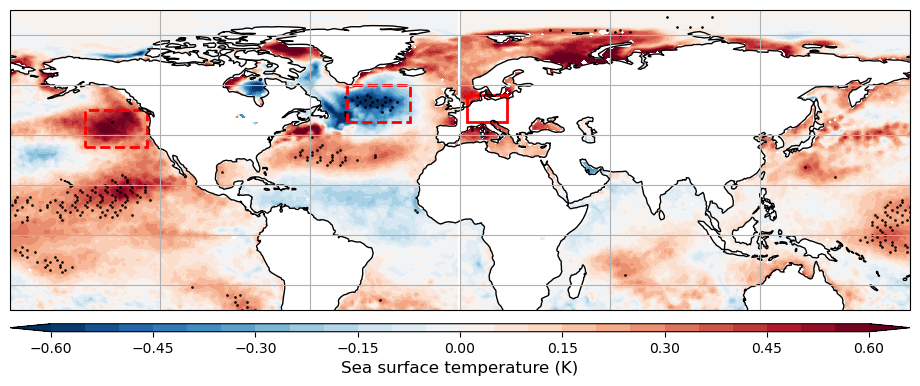

In [118]:
#%%
bnd_n = 90
bnd_s = -90
bnd_w = -180
bnd_e = 180

fig= plt.figure(figsize=(10, 4))

con_value = np.nanmean(SST_detrend[WSD_index],axis=0)
    
proj = ccrs.PlateCarree(central_longitude=0)##
ax = fig.add_axes([0.05, 0.15, 0.9, 0.8],projection = proj)
#ax.text(0.02, 1.05,'Geopotential height (m) lag '+ str(i_lag),fontsize=15,transform=ax.transAxes)
ax.contourf(LON_era5,LAT_era5,con_value,levels=np.arange(-0.7,0.75,0.05),cmap = 'RdBu_r',extend='both')

p_x = LON_era5[p_temp1<0.01][::5]
p_y = LAT_era5[p_temp1<0.01][::5]
ax.scatter(p_x,p_y,color='k',s=0.8)

ax.coastlines()
ax.gridlines()
# ax.set_xticks([-180, -120, -60,0, 60, 120, 180, ], crs=ccrs.PlateCarree())
# ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,
                                number_format='.0f')
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([-179, 180, -30, 90])
#rect = patches.Rectangle((lb1, bb1), rb1-lb1+1, tb1-bb1+1, linewidth=2, edgecolor='purple', facecolor='none')
#ax.add_patch(rect)
rect = patches.Rectangle((lb_EU, bb_EU), rb_EU-lb_EU+1, tb_EU-bb_EU+1, linewidth=2, edgecolor='red', facecolor='none')
rect1 = patches.Rectangle((-45, 45), 25, 15, linewidth=2, edgecolor='red', linestyle='--',facecolor='none')
rect2 = patches.Rectangle((-150, 35), 25, 15, linewidth=2, edgecolor='red', linestyle='--',facecolor='none')
ax.add_patch(rect)
ax.add_patch(rect1)
ax.add_patch(rect2)
cax = plt.axes([0.05, 0.12, 0.9, 0.02])
cbar = plt.colorbar(con,cax=cax,orientation='horizontal', shrink=0.8)
cbar.set_label('Sea surface temperature (K)',fontsize=12)
fig.savefig(u'Fig 7e.SST_WSD.jpg',bbox_inches = 'tight',pad_inches = 0.15, dpi=300) 

# z500

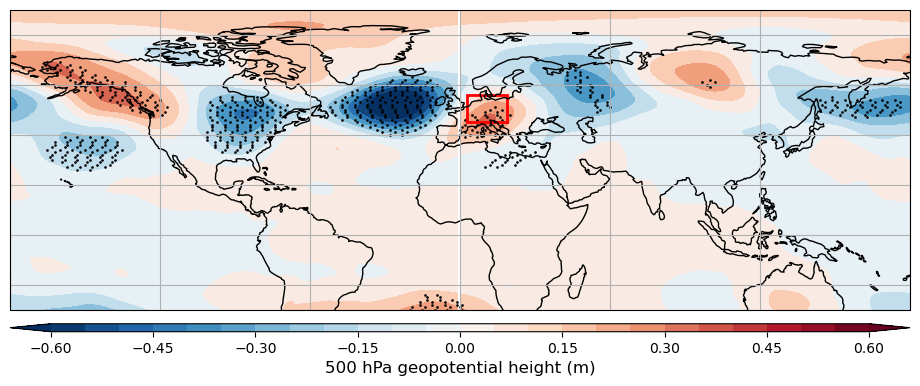

In [122]:
#%%
bnd_n = 90
bnd_s = -90
bnd_w = -180
bnd_e = 180

fig= plt.figure(figsize=(10, 4))

con_value = np.nanmean(z500_detrend[HW_index],axis=0)
    
proj = ccrs.PlateCarree(central_longitude=0)##
ax = fig.add_axes([0.05, 0.15, 0.9, 0.8],projection = proj)
#ax.text(0.02, 1.05,'Geopotential height (m) lag '+ str(i_lag),fontsize=15,transform=ax.transAxes)
ax.contourf(LON_era5,LAT_era5,con_value,levels=np.arange(-30,35,5),cmap = 'RdBu_r',extend='both')
p_x = LON_era5[p_temp2<0.05][::5]
p_y = LAT_era5[p_temp2<0.05][::5]
plt.scatter(p_x,p_y,color='k',s=0.8)

ax.coastlines()
ax.gridlines()
# ax.set_xticks([-180, -120, -60,0, 60, 120, 180, ], crs=ccrs.PlateCarree())
# ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,
                                number_format='.0f')
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([-179, 180, -30, 90])
#rect = patches.Rectangle((lb1, bb1), rb1-lb1+1, tb1-bb1+1, linewidth=2, edgecolor='purple', facecolor='none')
#ax.add_patch(rect)
rect = patches.Rectangle((lb_EU, bb_EU), rb_EU-lb_EU+1, tb_EU-bb_EU+1, linewidth=2, edgecolor='red', facecolor='none')
rect1 = patches.Rectangle((-45, 45), 25, 15, linewidth=2, edgecolor='red', linestyle='--',facecolor='none')
rect2 = patches.Rectangle((-150, 35), 25, 15, linewidth=2, edgecolor='red', linestyle='--',facecolor='none')
ax.add_patch(rect)
# ax.add_patch(rect1)
# ax.add_patch(rect2)
cax = plt.axes([0.05, 0.12, 0.9, 0.02])
cbar = plt.colorbar(con,cax=cax,orientation='horizontal', shrink=0.8)
cbar.set_label('500 hPa geopotential height (m)',fontsize=12)

fig.savefig(u'Fig 7b.z500_yearly_HW.jpg',bbox_inches = 'tight',pad_inches = 0.15, dpi=300) 

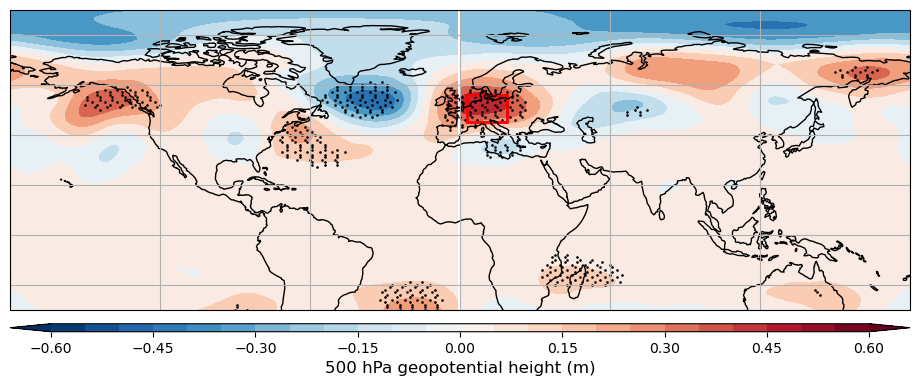

In [121]:
#%%
bnd_n = 90
bnd_s = -90
bnd_w = -180
bnd_e = 180

fig= plt.figure(figsize=(10, 4))

con_value = np.nanmean(z500_detrend[WSD_index],axis=0)
    
proj = ccrs.PlateCarree(central_longitude=0)##
ax = fig.add_axes([0.05, 0.15, 0.9, 0.8],projection = proj)
#ax.text(0.02, 1.05,'Geopotential height (m) lag '+ str(i_lag),fontsize=15,transform=ax.transAxes)
ax.contourf(LON_era5,LAT_era5,con_value,levels=np.arange(-30,35,5),cmap = 'RdBu_r',extend='both')

p_x = LON_era5[p_temp3<0.05][::5]
p_y = LAT_era5[p_temp3<0.05][::5]
plt.scatter(p_x,p_y,color='k',s=0.8)

ax.coastlines()
ax.gridlines()
# ax.set_xticks([-180, -120, -60,0, 60, 120, 180, ], crs=ccrs.PlateCarree())
# ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,
                                number_format='.0f')
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([-179, 180, -30, 90])
#rect = patches.Rectangle((lb1, bb1), rb1-lb1+1, tb1-bb1+1, linewidth=2, edgecolor='purple', facecolor='none')
#ax.add_patch(rect)
rect = patches.Rectangle((lb_EU, bb_EU), rb_EU-lb_EU+1, tb_EU-bb_EU+1, linewidth=2, edgecolor='red', facecolor='none')
rect1 = patches.Rectangle((-45, 45), 25, 15, linewidth=2, edgecolor='red', linestyle='--',facecolor='none')
rect2 = patches.Rectangle((-150, 35), 25, 15, linewidth=2, edgecolor='red', linestyle='--',facecolor='none')
ax.add_patch(rect)
# ax.add_patch(rect1)
# ax.add_patch(rect2)
cax = plt.axes([0.05, 0.12, 0.9, 0.02])
cbar = plt.colorbar(con,cax=cax,orientation='horizontal', shrink=0.8)
cbar.set_label('500 hPa geopotential height (m)',fontsize=12)

fig.savefig(u'Fig 7c.z500_yearly_WSD.jpg',bbox_inches = 'tight',pad_inches = 0.15, dpi=300) 